<a href="https://colab.research.google.com/github/selaaulia/PCVK_Genap_2022/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Melakukan import beberapa library yang dibutuhkan
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Meminta izin untuk mengakses drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **ORB Descriptor**

In [7]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

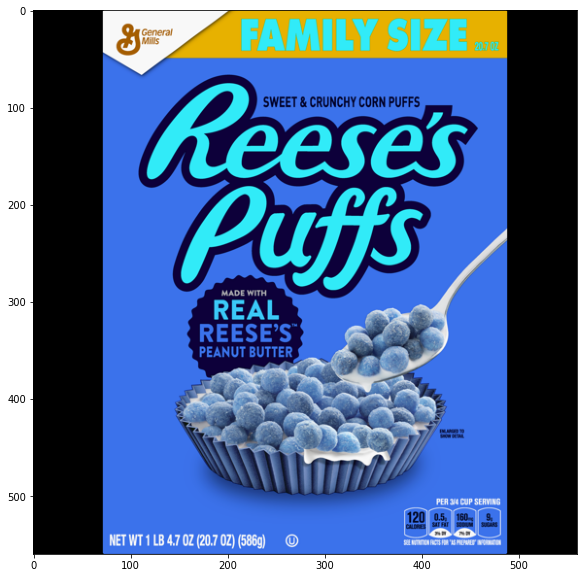

In [8]:
reeses = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_12/reeses_puffs.png')
display(reeses)

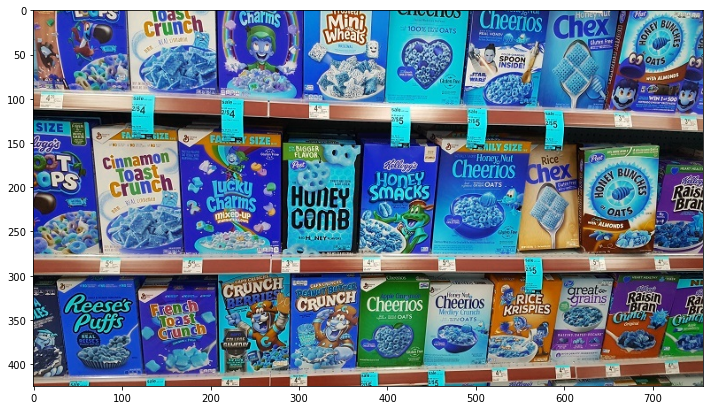

In [9]:
cereals = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_12/many_cereals.jpg')
display(cereals)

In [10]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2,des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

47.0

In [11]:
len(matches)

140

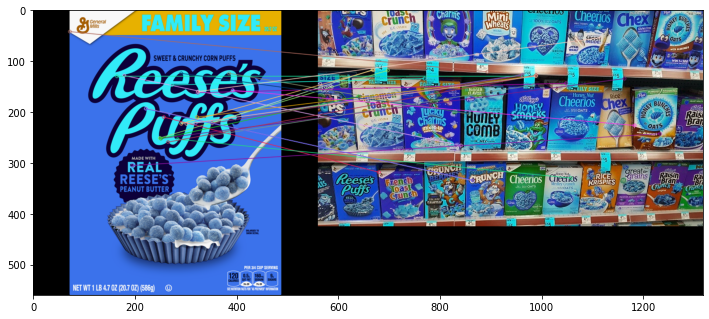

In [12]:
from sys import flags
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None, flags=2)
display(reeses_match)

**SIFT DEscriptor**

In [13]:
!pip install opencv-contrib-python==4.4.0.44

In [14]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# Ratio match1 < 75% Match2
for match1, match2 in matches:
  #jika jarak match 1 lebih kecil dari jarak 75% match2 descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

77

In [15]:
len(matches)

1501

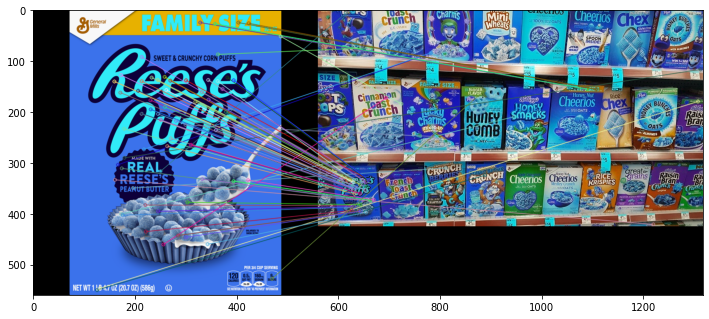

In [17]:
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

**Face Detection**

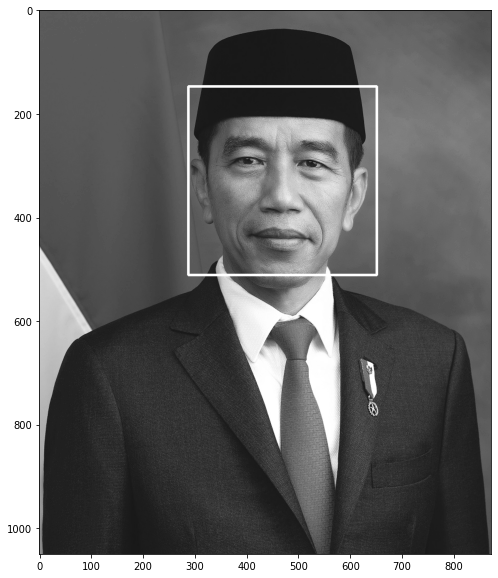

In [18]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_12/haarcascade_frontalface_alt2.xml')
jokowi = cv.imread('/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Pertemuan_12/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')